# Final Project

## Lincoln Brown


### Vaccine Adverse Event Reporting System (VAERS) 


In [551]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import thinkstats2
import thinkplot
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

data20 = pd.read_csv("2020VAERSDATA.csv")
symp20 = pd.read_csv("2020VAERSSYMPTOMS.csv")
vax20 = pd.read_csv("2020VAERSVAX.csv")
data21 = pd.read_csv("2021VAERSDATA.csv")
symp21 = pd.read_csv("2021VAERSSYMPTOMS.csv")
vax21 = pd.read_csv("2021VAERSVAX.csv")

data20.info()
symp20.info()
vax20.info()
data21.info()
symp21.info()
vax21.info()



/snap/jupyter/6/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48901 entries, 0 to 48900
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      48901 non-null  int64  
 1   RECVDATE      48901 non-null  object 
 2   STATE         42066 non-null  object 
 3   AGE_YRS       37535 non-null  float64
 4   CAGE_YR       36000 non-null  float64
 5   CAGE_MO       2829 non-null   float64
 6   SEX           48901 non-null  object 
 7   RPT_DATE      1004 non-null   object 
 8   SYMPTOM_TEXT  48895 non-null  object 
 9   DIED          166 non-null    object 
 10  DATEDIED      93 non-null     object 
 11  L_THREAT      314 non-null    object 
 12  ER_VISIT      174 non-null    object 
 13  HOSPITAL      1592 non-null   object 
 14  HOSPDAYS      682 non-null    float64
 15  X_STAY        29 non-null     object 
 16  DISABLE       929 non-null    object 
 17  RECOVD        45215 non-null  object 
 18  VAX_DATE      42687 non-nu

In [552]:
#Summary statistics

print(data20.describe())
print("\n")
print(data21.describe())



            VAERS_ID       AGE_YRS       CAGE_YR      CAGE_MO    HOSPDAYS  \
count   48901.000000  37535.000000  36000.000000  2829.000000  682.000000   
mean   887063.760455     44.453659     44.558194     0.299328    7.388563   
std     17648.852793     24.054108     24.317387     0.254874   21.283142   
min    855017.000000      0.000000      0.000000     0.000000    1.000000   
25%    872197.000000     26.000000     26.000000     0.100000    1.000000   
50%    887499.000000     50.000000     50.000000     0.300000    3.000000   
75%    902620.000000     64.000000     65.000000     0.500000    6.000000   
max    918561.000000    115.000000    117.000000     1.000000  365.000000   

            NUMDAYS     FORM_VERS  
count  38842.000000  48901.000000  
mean      26.290639      1.978446  
std      617.342821      0.145223  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      2.000000  
75%        1.000000      2.000000  
max    31011.00000

   STATE  num_state
6     CA       3782
55    TX       2738
12    FL       2407
43    NY       2292
48    PA       2199
29    MI       1679
20    IL       1603
45    OH       1587
36    NC       1249
40    NJ       1217
# of State IDs: 59
['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'FM' 'GA' 'GU'
 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MH' 'MI' 'MN'
 'MO' 'MP' 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK'
 'OR' 'PA' 'PR' 'PW' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA'
 'WI' 'WV' 'WY']


<BarContainer object of 66 artists>

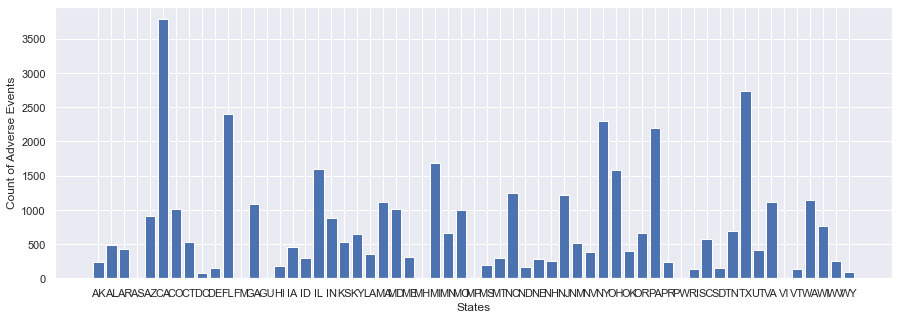

In [553]:
states = (data20
        .groupby(['STATE'])
        .apply(lambda x: pd.Series({'num_state': len(x['STATE'])}))
        .reset_index()
        .sort_values(['STATE', 'num_state'] )
         )

from collections import Counter
import matplotlib.pyplot as plt

#print(test.head(20))
sorted = states.sort_values(by='num_state', ascending=False)
#print(max(test['num_state']))
#print(sorted)
#death_counts = Counter(data20['DIED'])
max_cases = max(states['num_state'])

#states.loc[sorted['num_state'] == max_cases]
#Top ten states with the most adverse events in 2020
print(sorted.head(10))


states['STATE'] = states['STATE'].str.upper()
state_ids = states['STATE'].unique()
print(f"# of State IDs: {len(state_ids)}")
print(state_ids)

#States

xs = states['STATE']
ys = states['num_state']
plt.xlabel('States')
plt.ylabel('Count of Adverse Events')
plt.bar(xs,ys)

## 5 Variables for Analysis

* State
* Age
* Sex
* Vaccine Type
* Vaccine Manufacturer


In [554]:
#Histograms of each of the 5 variables
states20 = data20
states21 = data21

states20['STATE'] = states20['STATE'].str.upper()
states21['STATE'] = states21['STATE'].str.upper()

states20 = (data20
        .groupby(['STATE'])
        .apply(lambda x: pd.Series({'num_state': len(x['STATE'])}))
        .reset_index()
        .sort_values(['STATE', 'num_state'] )
         )

states21 = (data21
        .groupby(['STATE'])
        .apply(lambda x: pd.Series({'num_state': len(x['STATE'])}))
        .reset_index()
        .sort_values(['STATE', 'num_state'] )
         )

sexes20 = (data20
        .groupby(['SEX'])
        .apply(lambda x: pd.Series({'num_sex': len(x['SEX'])}))
        .reset_index()
        .sort_values(['SEX', 'num_sex'] )
         )

sexes21 = (data21
        .groupby(['SEX'])
        .apply(lambda x: pd.Series({'num_sex': len(x['SEX'])}))
        .reset_index()
        .sort_values(['SEX', 'num_sex'] )
         )

vaxtype20 = (vax20
        .groupby(['VAX_TYPE'])
        .apply(lambda x: pd.Series({'num_type': len(x['VAX_TYPE'])}))
        .reset_index()
        .sort_values(['VAX_TYPE', 'num_type'] )
         )

vaxtype21 = (vax21
        .groupby(['VAX_TYPE'])
        .apply(lambda x: pd.Series({'num_type': len(x['VAX_TYPE'])}))
        .reset_index()
        .sort_values(['VAX_TYPE', 'num_type'] )
         )

vaxmanu20 = (vax20
        .groupby(['VAX_MANU'])
        .apply(lambda x: pd.Series({'num_manu': len(x['VAX_MANU'])}))
        .reset_index()
        .sort_values(['VAX_MANU', 'num_manu'] )
         )

vaxmanu21 = (vax21
        .groupby(['VAX_MANU'])
        .apply(lambda x: pd.Series({'num_manu': len(x['VAX_MANU'])}))
        .reset_index()
        .sort_values(['VAX_MANU', 'num_manu'] )
         )

died20 = data20[data20.DIED=='Y']

died21 = data21[data21.DIED=='Y']

died20 = died20.merge(vax20, how='inner')

died21 = died21.merge(vax21, how='inner')

merge20 = data20.merge(vax20, how='inner')

merge21 = data21.merge(vax21, how='inner')

<BarContainer object of 59 artists>

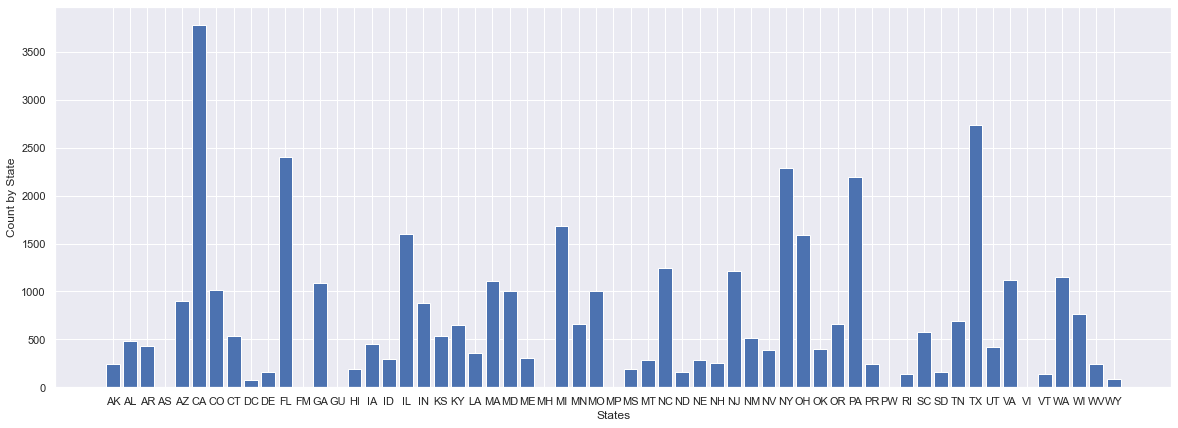

In [555]:
f20 = plt.figure()
f20.set_figwidth(20)
f20.set_figheight(7)
xs20 = states20['STATE']
ys20= states20['num_state']

plt.xlabel('States')
plt.ylabel('Count by State')
plt.bar(xs20, ys20)

<BarContainer object of 62 artists>

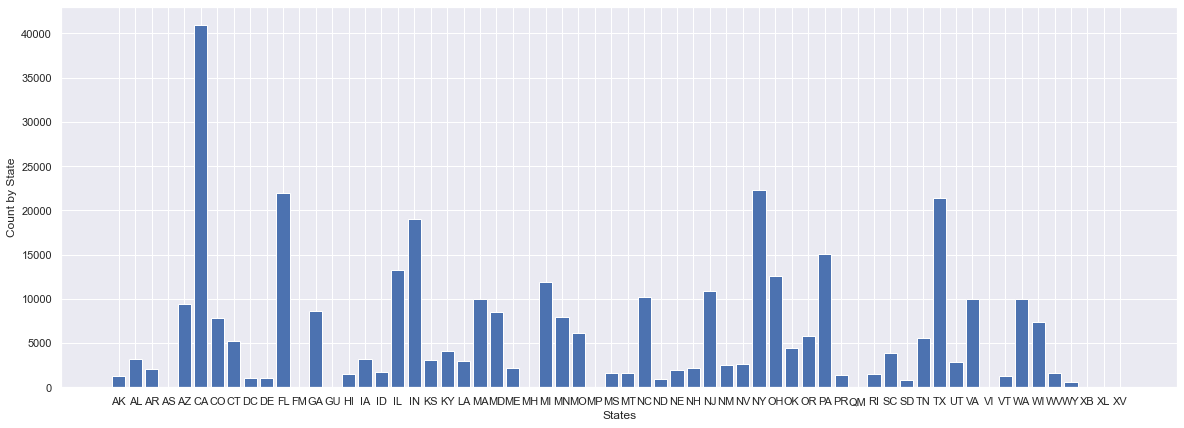

In [556]:
f21 = plt.figure()
f21.set_figwidth(20)
f21.set_figheight(7)
xs21 = states21['STATE']
ys21= states21['num_state']

plt.xlabel('States')
plt.ylabel('Count by State')
plt.bar(xs21, ys21)

<BarContainer object of 3 artists>

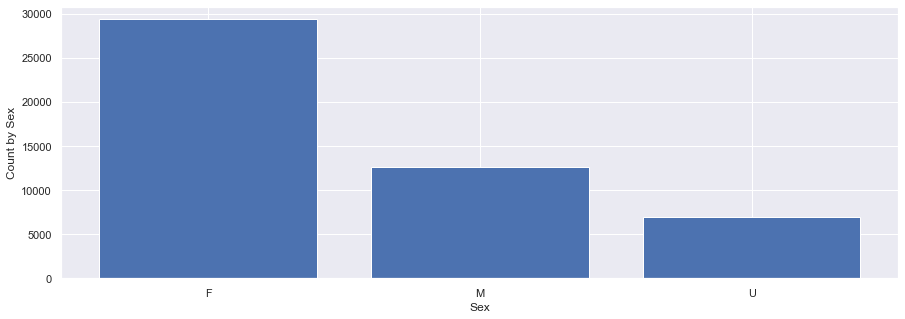

In [557]:
x_sex20 = sexes20['SEX']
y_sex20 = sexes20['num_sex']

plt.xlabel('Sex')
plt.ylabel('Count by Sex')
plt.bar(x_sex20, y_sex20)

<BarContainer object of 3 artists>

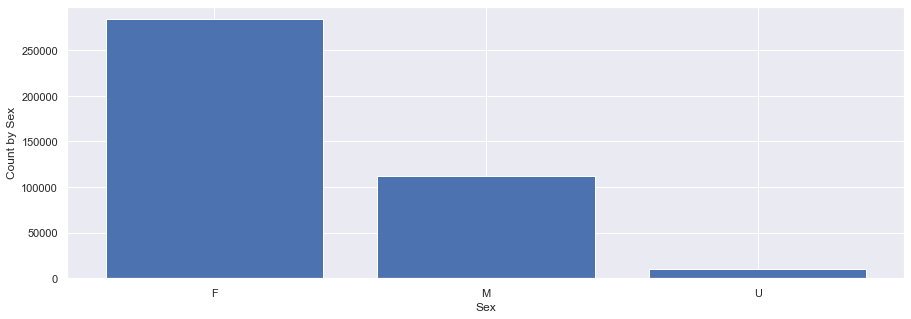

In [558]:
x_sex21 = sexes21['SEX']
y_sex21 = sexes21['num_sex']

plt.xlabel('Sex')
plt.ylabel('Count by Sex')
plt.bar(x_sex21, y_sex21)

(array([5.337e+03, 2.858e+03, 4.476e+03, 4.371e+03, 6.346e+03, 8.204e+03,
        4.909e+03, 9.480e+02, 8.500e+01, 1.000e+00]),
 array([  0. ,  11.5,  23. ,  34.5,  46. ,  57.5,  69. ,  80.5,  92. ,
        103.5, 115. ]),
 <BarContainer object of 10 artists>)

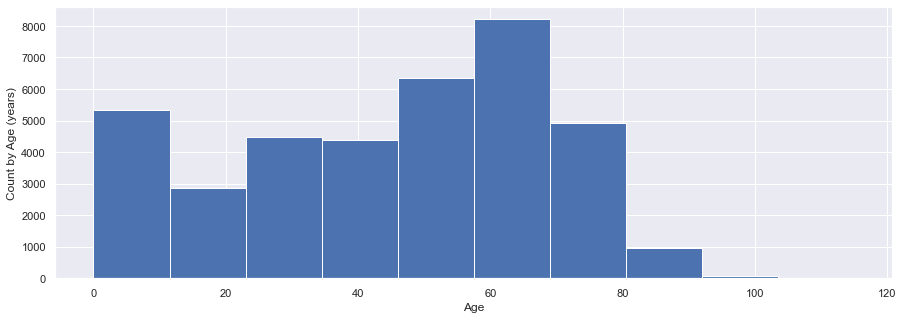

In [594]:
plt.xlabel('Age')
plt.ylabel('Count by Age (years)')
plt.hist(data20['AGE_YRS'])

(array([8.2000e+02, 3.2620e+04, 6.7437e+04, 7.9728e+04, 7.9930e+04,
        7.3088e+04, 3.5322e+04, 8.8490e+03, 6.4200e+02, 8.0000e+00]),
 array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
        107.1, 119. ]),
 <BarContainer object of 10 artists>)

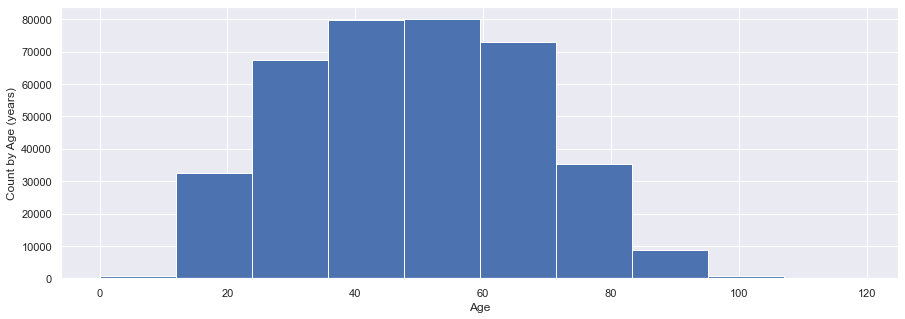

In [595]:
plt.xlabel('Age')
plt.ylabel('Count by Age (years)')
plt.hist(data21['AGE_YRS'])

<BarContainer object of 62 artists>

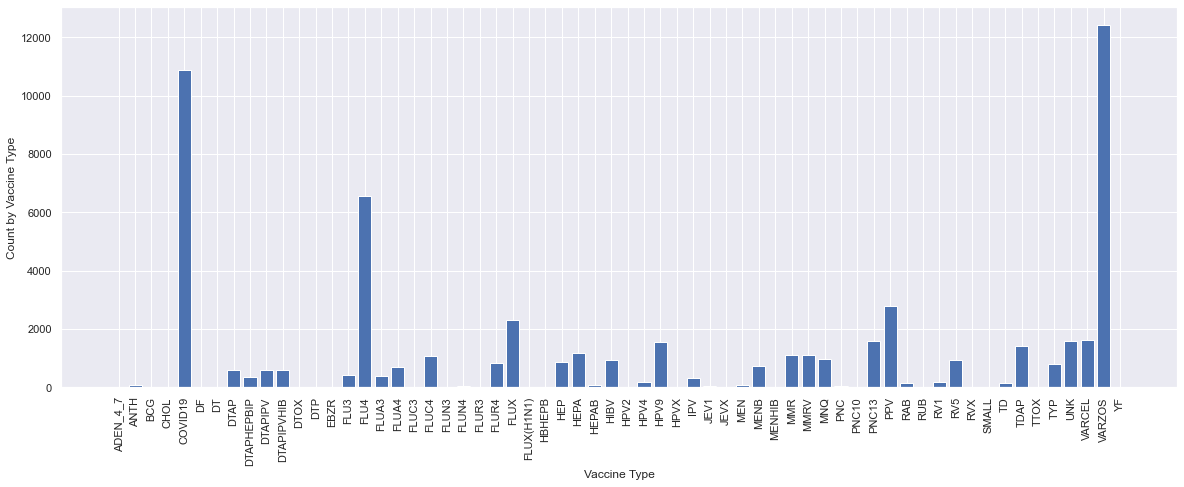

In [561]:
type20 = plt.figure()
type20.set_figwidth(20)
type20.set_figheight(7)
xs_type20 = vaxtype20['VAX_TYPE']
ys_type20= vaxtype20['num_type']

plt.xlabel('Vaccine Type')
plt.ylabel('Count by Vaccine Type')
plt.xticks(rotation='vertical')
plt.bar(xs_type20, ys_type20)

<BarContainer object of 57 artists>

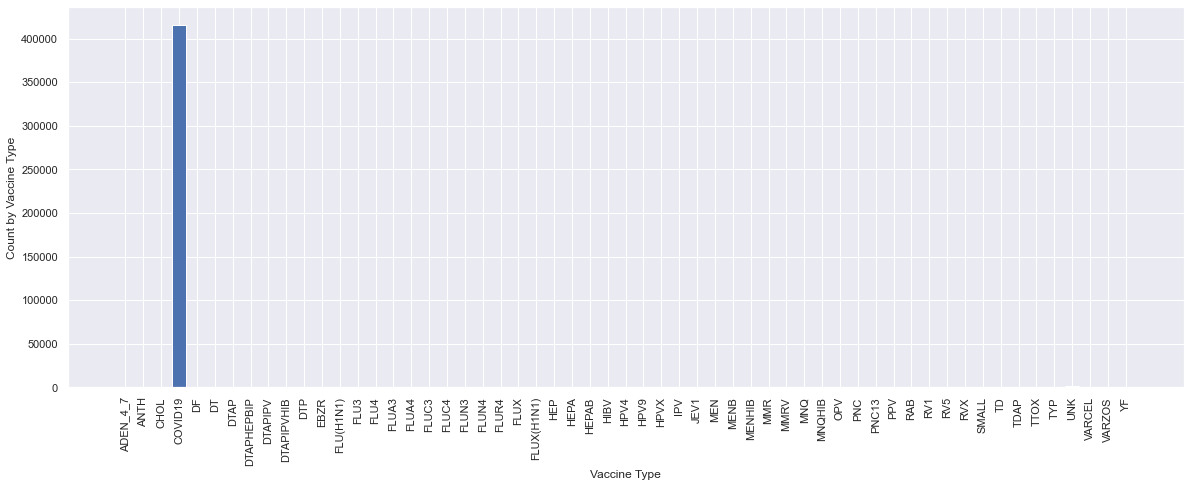

In [562]:
type21 = plt.figure()
type21.set_figwidth(20)
type21.set_figheight(7)
xs_type21 = vaxtype21['VAX_TYPE']
ys_type21= vaxtype21['num_type']

plt.xlabel('Vaccine Type')
plt.ylabel('Count by Vaccine Type')
plt.xticks(rotation='vertical')
plt.bar(xs_type21, ys_type21)

<BarContainer object of 20 artists>

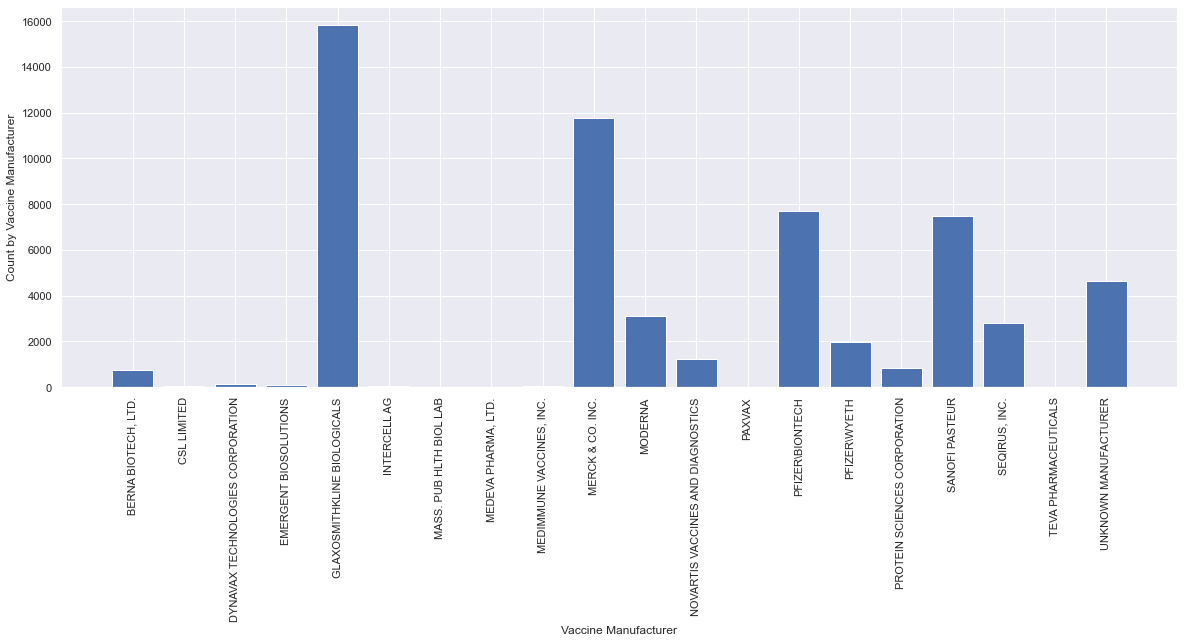

In [563]:
manu20 = plt.figure()
manu20.set_figwidth(20)
manu20.set_figheight(7)
xs_manu20 = vaxmanu20['VAX_MANU']
ys_manu20= vaxmanu20['num_manu']

plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Count by Vaccine Manufacturer')
plt.xticks(rotation='vertical')
plt.bar(xs_manu20, ys_manu20)

<BarContainer object of 20 artists>

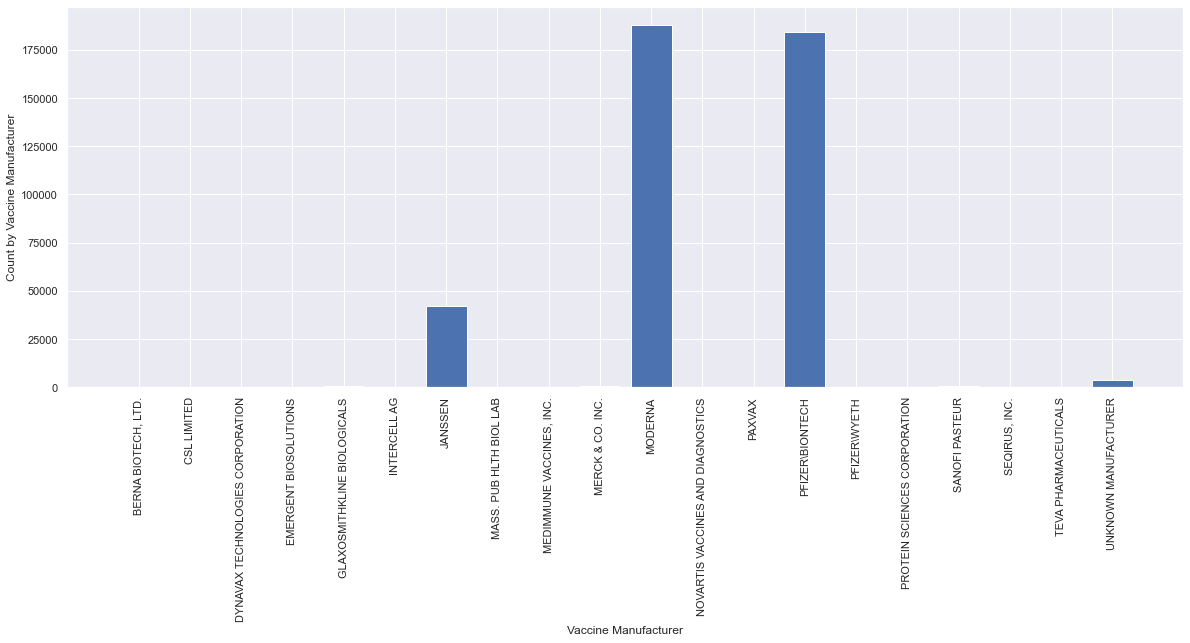

In [564]:
manu21 = plt.figure()
manu21.set_figwidth(20)
manu21.set_figheight(7)
xs_manu21 = vaxmanu21['VAX_MANU']
ys_manu21= vaxmanu21['num_manu']

plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Count by Vaccine Manufacturer')
plt.xticks(rotation='vertical')
plt.bar(xs_manu21, ys_manu21)

In [565]:
#Other descriptive statistics 
print(data20['AGE_YRS'].describe())
print("\n")
print(data21['AGE_YRS'].describe())

count    37535.000000
mean        44.453659
std         24.054108
min          0.000000
25%         26.000000
50%         50.000000
75%         64.000000
max        115.000000
Name: AGE_YRS, dtype: float64


count    378444.000000
mean         48.917554
std          18.333868
min           0.000000
25%          35.000000
50%          49.000000
75%          63.000000
max         119.000000
Name: AGE_YRS, dtype: float64


In [566]:
#Compare two scenarios with a PMF

males20 = data20[data20.SEX == 'M']
females20 = data20[data20.SEX == 'F']

males20_pmf = thinkstats2.Pmf(males20.AGE_YRS, label='Males')
females20_pmf = thinkstats2.Pmf(females20.AGE_YRS, label='Females')


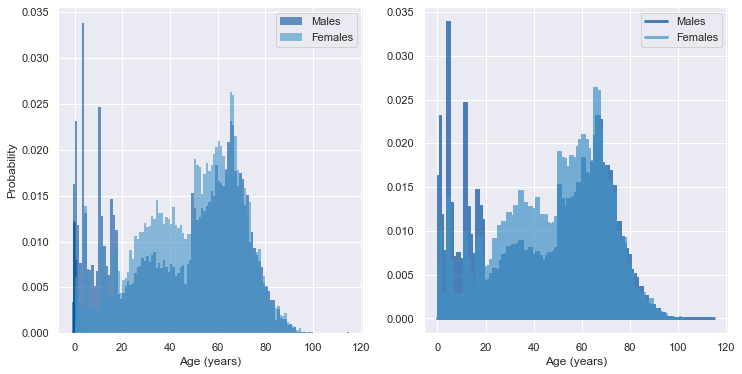

In [567]:
width=1
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(males20_pmf, align='right', width=width)
thinkplot.Hist(females20_pmf, align='left', width=width)
thinkplot.Config(xlabel='Age (years)', ylabel='Probability')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([males20_pmf, females20_pmf])
thinkplot.Config(xlabel='Age (years)')

In [568]:
#Compare two scenarios with a PMF

males21 = data21[data21.SEX == 'M']
females21 = data21[data21.SEX == 'F']

males21_pmf = thinkstats2.Pmf(males21.AGE_YRS, label='Males')
females21_pmf = thinkstats2.Pmf(females21.AGE_YRS, label='Females')


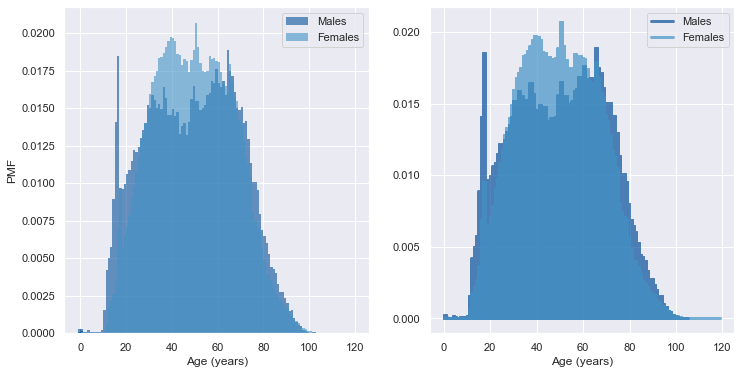

In [569]:
width=1
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(males21_pmf, align='right', width=width)
thinkplot.Hist(females21_pmf, align='left', width=width)
thinkplot.Config(xlabel='Age (years)', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([males21_pmf, females21_pmf])
thinkplot.Config(xlabel='Age (years)')

In [570]:
#CDF

males20 = data20[data20.SEX == 'M']
females20 = data20[data20.SEX == 'F']

males20_cdf = thinkstats2.Cdf(males20.AGE_YRS, label='Males')
females20_cdf = thinkstats2.Cdf(females20.AGE_YRS, label='Females')


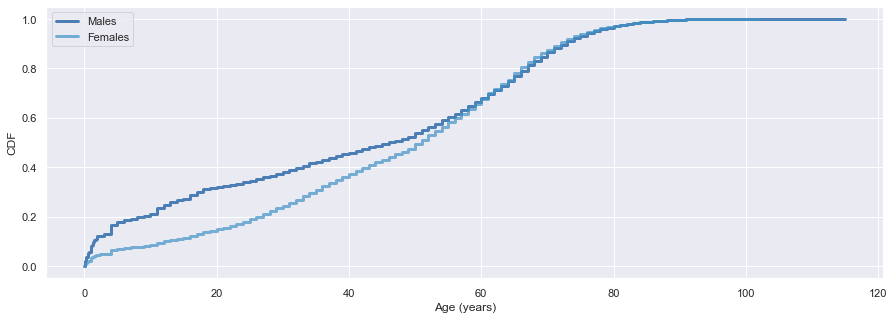

<Figure size 576x432 with 0 Axes>

In [571]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([males20_cdf, females20_cdf])
thinkplot.Show(xlabel='Age (years)', ylabel='CDF')

In [572]:
#CDF

males21 = data21[data21.SEX == 'M']
females21 = data21[data21.SEX == 'F']

males21_cdf = thinkstats2.Cdf(males21.AGE_YRS, label='Males')
females21_cdf = thinkstats2.Cdf(females21.AGE_YRS, label='Females')


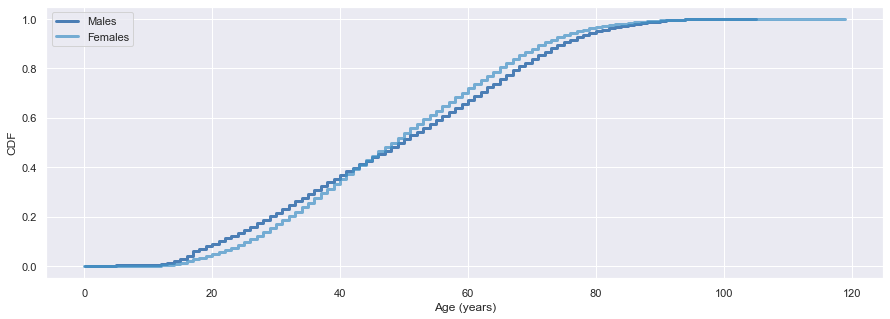

<Figure size 576x432 with 0 Axes>

In [573]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([males21_cdf, females21_cdf])
thinkplot.Show(xlabel='Age (years)', ylabel='CDF')

Mean, Var 44.4436955280685 549.3611965428823
Sigma 23.438455506770968


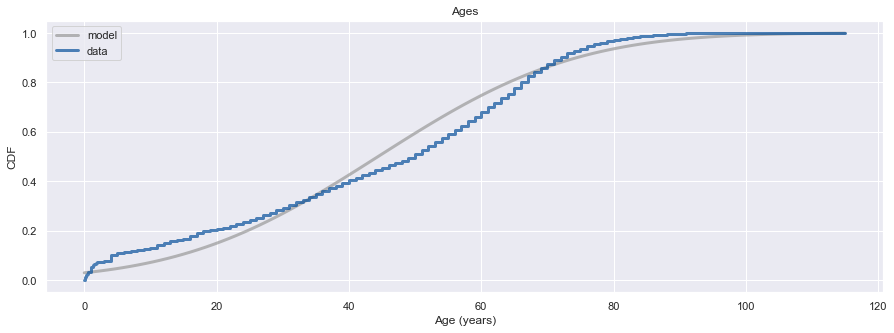

In [596]:
#Analytical Distribution

ages = data20.AGE_YRS.dropna()

mu, var = thinkstats2.TrimmedMeanVar(ages, p=0.01)
print('Mean, Var', mu, var)

sigma = np.sqrt(var)
print('Sigma', sigma)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=115)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf= thinkstats2.Cdf(ages, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title ='Ages',
                 xlabel= 'Age (years)',
                 ylabel= 'CDF')


Mean, Var 48.85250865518394 308.89160009260877
Sigma 17.575312233147063


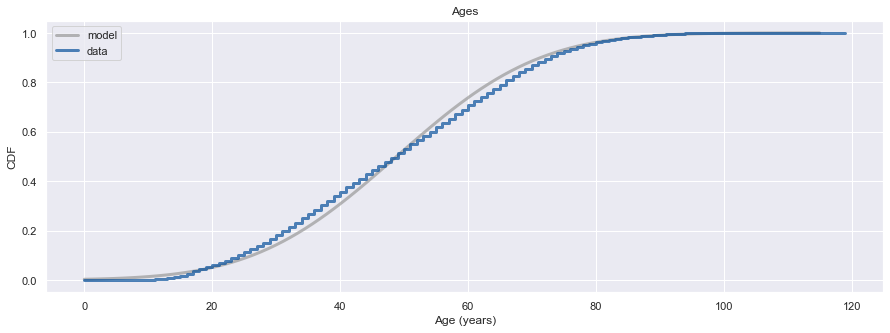

In [597]:
#Analytical Distribution

ages = data21.AGE_YRS.dropna()

mu, var = thinkstats2.TrimmedMeanVar(ages, p=0.01)
print('Mean, Var', mu, var)

sigma = np.sqrt(var)
print('Sigma', sigma)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=115)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf= thinkstats2.Cdf(ages, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title ='Ages',
                 xlabel= 'Age (years)',
                 ylabel= 'CDF')


Due to the fact that the data sets I am using do not have multiple numeric data points, I will be using categorical scatter plots in the next section. 

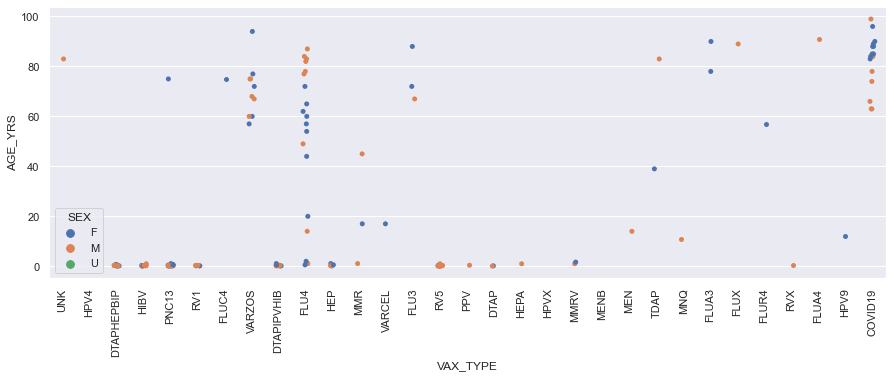

In [575]:
# Two scatter plots
#sns.set(rc={"figure.figsize":(20, 5)}) #width=20, height=5

plt.figure(figsize=(15, 5))
plot = sns.stripplot(x="VAX_TYPE", y="AGE_YRS", data=died20, hue="SEX")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

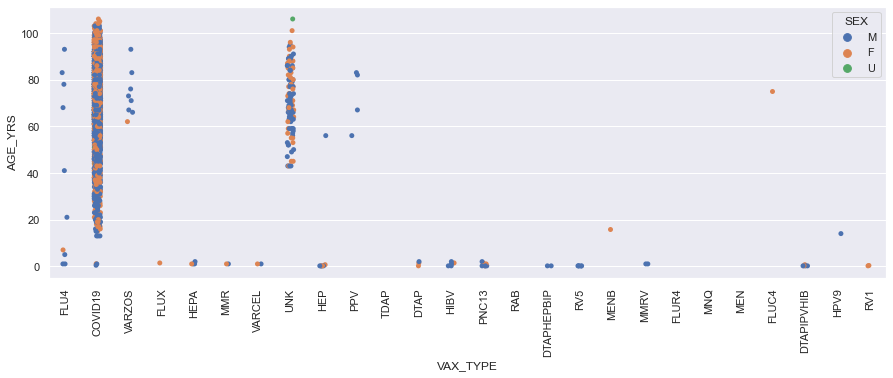

In [576]:
plt.figure(figsize=(15, 5))
plot = sns.stripplot(x="VAX_TYPE", y="AGE_YRS", data=died21, hue="SEX")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

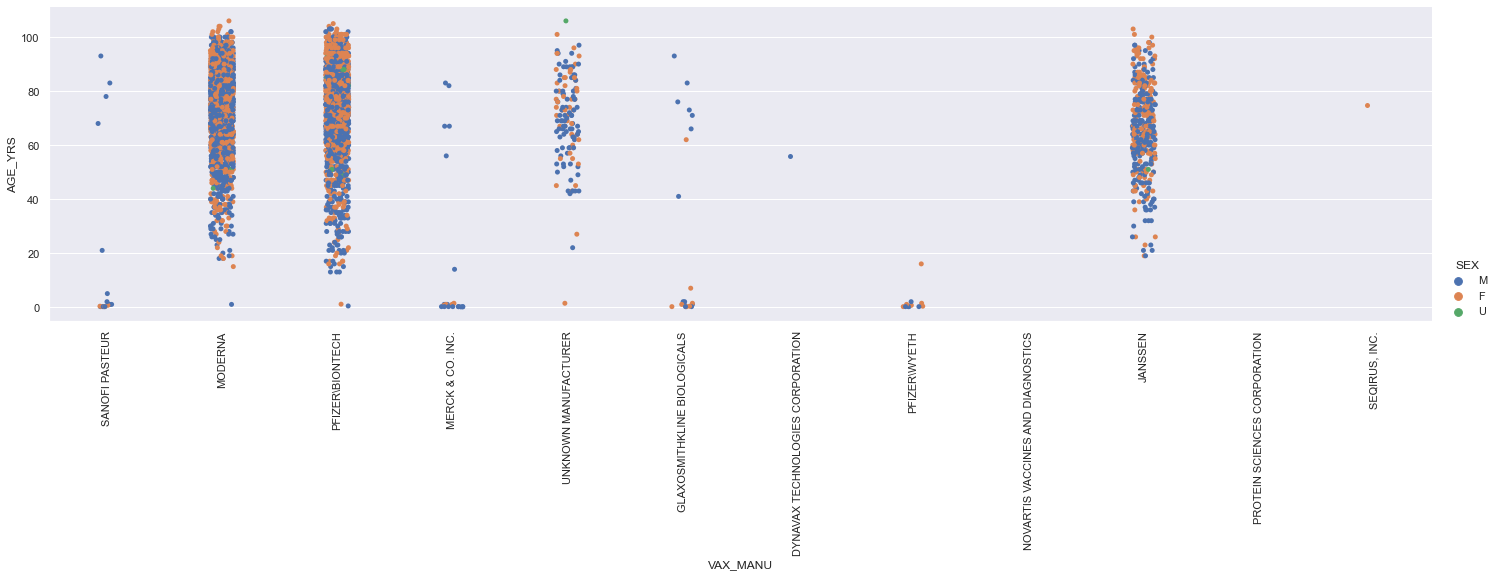

In [577]:
plot = sns.catplot(x="VAX_MANU", y="AGE_YRS", hue="SEX", data=died21, height=5, aspect=4, jitter=True)
plot.set_xticklabels(rotation=90)


## Correlation

In [578]:
#Parametric test using one-way anova
x = died21[died21.VAX_MANU=='MODERNA'].AGE_YRS.dropna()
y = died21[died21.VAX_MANU=='PFIZER\\BIONTECH'].AGE_YRS.dropna()
z = died21[died21.VAX_MANU=='JANSSEN'].AGE_YRS.dropna()

F, p = stats.f_oneway(x,y,z)

print(F, p)


52.28253803943606 3.272660643120867e-23


In [579]:
#Non-parametric test for correlation with categorical data
x = died21[died21.VAX_MANU=='MODERNA'].AGE_YRS.dropna()
y = died21[died21.VAX_MANU=='PFIZER\\BIONTECH'].AGE_YRS.dropna()
z = died21[died21.VAX_MANU=='JANSSEN'].AGE_YRS.dropna()

F, p = stats.kruskal(x,y,z)
print(F)

114.9507044283698


In [580]:
#To compute the p-value of an observed difference in means, 
#we can assume that there is no difference between the groups and generate simulated results by shuffling the data.
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

### Looking at the means between the ages, my hypothesis is that there is a difference between the mean age in 2020 and 2021.

Null Hypothesis: 
* H0 = mean age 2020 == mean age 2021

Alternative Hypothesis
* HA = mean age 2020 != mean age 2021


In [612]:
# Hypothesis Test
ages20 = died20.AGE_YRS.dropna()
ages21 = died21.AGE_YRS.dropna()
under1_20 = died20.loc[died20.AGE_YRS < 1]

under1_21 = ages21[ages21 < 1]
print(f"Number of deaths in 2020: {len(ages20)}")
print(f"Number of deaths in 2021: {len(ages21)}")
print(f"Number of deaths that were under 1 in 2020: {len(under1_20)}")
print(f"Number of deaths that were under 1 in 2021: {len(under1_21)}")
died_mean20 = died20.AGE_YRS.mean()
died_mean21 = died21.AGE_YRS.mean()
died_median20 = died20.AGE_YRS.median()
died_median21 = died21.AGE_YRS.median()

print(f"Mean age that died in 2020: {died_mean20}")
print(f"median age that died in 2020: {died_median20}")

print(f"\nMean age that died in 2021: {died_mean21}")
print(f"median age that died in 2021: {died_median21}")

Number of deaths in 2020: 172
Number of deaths in 2021: 5518
Number of deaths that were under 1 in 2020: 98
Number of deaths that were under 1 in 2021: 32
Mean age that died in 2020: 24.15843023255814
median age that died in 2020: 0.5

Mean age that died in 2021: 72.83803008336353
median age that died in 2021: 75.0


In [582]:
ht_data = ages20, ages21

In [583]:
hyp_test = DiffMeansPermute(ht_data)
pvalue = hyp_test.PValue()
test_statistic = hyp_test.TestStatistic(ht_data)
test_statistic
pvalue = hyp_test.PValue()
pvalue

0.0

In [584]:
t_value, p_value = stats.ttest_ind(ages20,ages21)

print(f"Test statistic is: {t_value}")

print(f"p-value is: {p_value}")

Test statistic is: -34.980263550450395
p-value is: 5.498295024697795e-243


The p-value is significant and with 99% confidence we can reject the null hypothesis that there is not a difference between the average age in 2020 and 2021. 

### Looking at the means between the ages of males and females, my hypothesis is that there is a difference between the mean age between men and women in 2021. 

Null Hypothesis: 
* H0 = female mean age 2021 == male mean age 2021

Alternative Hypothesis:
* HA = female mean age 2021 != male mean age 2021

In [614]:
print(f"Total counts for females in 2021: {females21.AGE_YRS.mean()}")
print(f"Average age for males in 2021: {males21.AGE_YRS.mean()}")

Average age for females in 2021: 48.87142458585687
Average age for males in 2021: 49.10236417005965


In [585]:
females21 = data21.loc[data21['SEX'] == 'F']
males21 = data21.loc[data21['SEX'] == 'M']

females_age21 = females21.AGE_YRS.dropna()
males_age21 = males21.AGE_YRS.dropna()

t_value, p_value = stats.ttest_ind(females_age21,males_age21)

print(f"Test statistic is: {t_value}")

print(f"p-value is: {p_value}")

Test statistic is: -3.4745983634709336
p-value is: 0.0005116763119314343


With a significant pvalue of .0005, with 99% confidence we can reject the null hypothesis in favor of the alternative hypothesis that the difference in mean age between men and women is not due to chance. 

In [586]:
# Regression Analysis
#data20['DIED'] = (data20.DIED=='N').astype(int)
merge21.VAX_MANU = merge21.VAX_MANU.astype('category')
#merge21.DIED = merge21.DIED.dropna()


model = smf.ols('AGE_YRS ~ VAX_MANU + DIED', data=merge21)
results = model.fit()
results.summary()

/home/x/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AGE_YRS   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          6.00e-193
Time:                        01:42:26   Log-Likelihood:                -23059.
No. Observations:                5518   AIC:                         4.614e+04
Df Residuals:                    5508   BIC:                         4.620e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        43.8555      2.155     20.347      0.000      39.630      48.081
VAX_MANU[T.CSL LIMITED]                        3.784e-14   7.28e-14      0.520      0.603   -1.05e-13     1.8e-13
VAX_MANU[T.DYNAVAX TECHNOLOGIES CORPORATION]     12.1445     14.464      0.840      0.401     -16.211      40.500
VAX_MANU[T.EMERGENT BIOSOLUTIONS]             -9.149e-15   1.38e-14     -0.665      0.506   -3.61e-14    1.78e-14
VAX_MANU[T.GLAXOSMITHKLINE BIOLOGICALS]         -16.1603      3.793     -4.261      0.000     -23.596      -8.724
VAX_MANU[T.INTERCELL AG]                       1.448e-15   1.87e-15      0.774      0.439   -2.22e-15    5.12e-15
VAX_MANU[T.JANSSEN]                              22.1420      2.271      9.748      0.000      17.689      26.595
VAX_MANU[T.MASS. PUB HLTH BIOL LAB]           -2.118e-15   2.21e-15     -0.959      0.337   -6.45e-15    2.21e-15
VAX_MANU[T.MEDIMMUNE VACCINES, INC.]          -3.203e-15   1.63e-15     -1.967      0.049   -6.39e-15    -1.1e-17
VAX_MANU[T.MERCK & CO. INC.]                    -27.4016      3.680     -7.447      0.000     -34.615     -20.188
VAX_MANU[T.MODERNA]                              30.3317      2.174     13.953      0.000      26.070      34.593
VAX_MANU[T.NOVARTIS VACCINES AND DIAGNOSTICS]          0          0        nan        nan           0           0
VAX_MANU[T.PAXVAX]                                     0          0        nan        nan           0           0
VAX_MANU[T.PFIZER\BIONTECH]                      30.4776      2.175     14.010      0.000      26.213      34.742
VAX_MANU[T.PFIZER\WYETH]                        -41.8310      4.821     -8.677      0.000     -51.282     -32.380
VAX_MANU[T.PROTEIN SCIENCES CORPORATION]               0          0        nan        nan           0           0
VAX_MANU[T.SANOFI PASTEUR]                      -24.1322      4.001     -6.031      0.000     -31.976     -16.288
VAX_MANU[T.SEQIRUS, INC.]                        31.1445     14.464      2.153      0.031       2.789      59.500
VAX_MANU[T.TEVA PHARMACEUTICALS]                       0          0        nan        nan           0           0
VAX_MANU[T.UNKNOWN MANUFACTURER]                 27.1402      2.480     10.944      0.000      22.279      32.002
==============================================================================
Omnibus:                      611.161   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.951
Skew:                          -0.777   Prob(JB):                    8.11e-220
Kurtosis:                       4.404   Cond. No.                          inf
==================================================================

In [588]:
merge21.VAX_MANU = merge21.VAX_MANU.astype('category')
merge21.VAX_TYPE = merge21.VAX_TYPE.astype('category')
merge21.DIED = merge21.DIED.replace(np.nan, 'N')
#merge21.DIED = merge21.DIED.astype(int)
#data20['DIED'] = (data20.DIED=='N').astype(int)


model = smf.ols('AGE_YRS ~ VAX_MANU + VAX_TYPE + DIED', data=merge21)
#model = smf.logit('DIED ~ VAX_TYPE + AGE_YRS', data=merge21)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AGE_YRS   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     283.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:42:33   Log-Likelihood:            -1.6923e+06
No. Observations:              392840   AIC:                         3.385e+06
Df Residuals:                  392771   BIC:                         3.386e+06
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        29.0070      2.157     13.449      0.000      24.780      33.234
VAX_MANU[T.CSL LIMITED]                          27.4299     18.208      1.506      0.132      -8.258      63.117
VAX_MANU[T.DYNAVAX TECHNOLOGIES CORPORATION]     16.1313      7.889      2.045      0.041       0.669      31.593
VAX_MANU[T.EMERGENT BIOSOLUTIONS]               -11.5316     13.455     -0.857      0.391     -37.902      14.839
VAX_MANU[T.GLAXOSMITHKLINE BIOLOGICALS]          -2.0204      2.994     -0.675      0.500      -7.889       3.848
VAX_MANU[T.INTERCELL AG]                         17.2465      6.235      2.766      0.006       5.026      29.467
VAX_MANU[T.JANSSEN]                             -13.9119      3.128     -4.447      0.000     -20.043      -7.781
VAX_MANU[T.MASS. PUB HLTH BIOL LAB]             -24.9316     24.141     -1.033      0.302     -72.248      22.385
VAX_MANU[T.MEDIMMUNE VACCINES, INC.]             -1.8368      5.129     -0.358      0.720     -11.889       8.215
VAX_MANU[T.MERCK & CO. INC.]                     -3.1636      3.282     -0.964      0.335      -9.595       3.268
VAX_MANU[T.MODERNA]                              -7.6865      3.127     -2.458      0.014     -13.816      -1.558
VAX_MANU[T.NOVARTIS VACCINES AND DIAGNOSTICS]     5.5353      4.845      1.143      0.253      -3.960      15.031
VAX_MANU[T.PAXVAX]                               13.3541     18.333      0.728      0.466     -22.579      49.287
VAX_MANU[T.PFIZER\BIONTECH]                     -10.6379      3.127     -3.402      0.001     -16.767      -4.509
VAX_MANU[T.PFIZER\WYETH]                          1.6382      7.581      0.216      0.829     -13.221      16.497
VAX_MANU[T.PROTEIN SCIENCES CORPORATION]          2.0188      1.570      1.286      0.198      -1.057       5.095
VAX_MANU[T.SANOFI PASTEUR]                        5.7413      3.009      1.908      0.056      -0.156      11.638
VAX_MANU[T.SEQIRUS, INC.]                         6.2071      3.499      1.774      0.076      -0.651      13.065
VAX_MANU[T.TEVA PHARMACEUTICALS]                 18.3567      5.489      3.344      0.001       7.599      29.114
VAX_MANU[T.UNKNOWN MANUFACTURER]                 -8.9316      3.082     -2.898      0.004     -14.973      -2.890
VAX_TYPE[T.ANTH]                                 15.9247     12.732      1.251      0.211      -9.031      40.880
VAX_TYPE[T.CHOL]                                  3.9247     17.789      0.221      0.825     -30.941      38.790
VAX_TYPE[T.COVID19]                              29.2420      2.861     10.220      0.000      23.634      34.850
VAX_TYPE[T.DF]                                   -1.7482      9.026     -0.194      0.846     -19.438      15.942
VAX_T

In [611]:
merge21 = data21.merge(vax21, how='inner')
merge21.DIED = merge21.DIED.replace(np.nan, 'N')

merge21.DIED.unique()

testmerge = merge21

In [590]:
testmerge
testmerge.STATE = testmerge.STATE.astype('category')
#testmerge.SEX = testmerge.SEX.astype('category')
#testmerge['DIED'] = (testmerge.DIED=='N').astype(int)
testmerge['DIED'] = (testmerge.DIED=='Y').astype(int)
model = smf.ols('AGE_YRS ~ SEX + DIED', data=testmerge)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AGE_YRS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3230.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:42:37   Log-Likelihood:            -1.6970e+06
No. Observations:              392840   AIC:                         3.394e+06
Df Residuals:                  392836   BIC:                         3.394e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7065      0.034   1414.921      0.000      48.639      48.774
SEX[T.M]      -0.1398      0.065     -2.156      0.031      -0.267      -0.013
SEX[T.U]      -3.0613      0.380     -8.054      0.000      -3.806      -2.316
DIED          24.2299      0.247     97.987      0.000      23.745      24.715
==============================================================================
Omnibus:                    20062.822   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7970.875
Skew:                           0.048   Prob(JB):                         0.00
Kurtosis:                       2.309   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [591]:
testmerge.STATE = testmerge.STATE.astype('category')
#testmerge.SEX = testmerge.SEX.astype('category')
#testmerge['DIED'] = (testmerge.DIED=='N').astype(int)
testmerge['DIED'] = (testmerge.DIED=='Y').astype(int)
model = smf.ols('AGE_YRS ~ SEX + DIED', data=testmerge)
results = model.fit()
results.summary()

/home/x/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AGE_YRS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     43.16
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.82e-19
Time:                        02:08:28   Log-Likelihood:            -1.7017e+06
No. Observations:              392840   AIC:                         3.403e+06
Df Residuals:                  392837   BIC:                         3.403e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9129      0.035   1406.501      0.000      48.845      48.981
SEX[T.M]       0.3337      0.065      5.099      0.000       0.205       0.462
SEX[T.U]      -2.8899      0.385     -7.512      0.000      -3.644      -2.136
DIED                0          0        nan        nan           0           0
==============================================================================
Omnibus:                    22744.217   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8691.737
Skew:                           0.067   Prob(JB):                         0.00
Kurtosis:                       2.284   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
405996,1442854,07/02/2021,FL,17.0,17.0,NaN,F,NaN,Error: Wrong Dose of Vaccine - Too Low-,NaN,...,NaN,NaN,NaN,NaN,2,07/02/2021,NaN,NaN,NaN,NaN
405997,1442855,07/02/2021,RI,52.0,52.0,NaN,F,NaN,I am not certain if this outcome is related to...,NaN,...,none,mild hypothyroidism,frozen shoulder following influenza vaccine O...,NaN,2,07/02/2021,NaN,Y,NaN,chlorhexidine scrub (rash)
405998,1442856,07/02/2021,CA,37.0,37.0,NaN,F,NaN,"Systemic: Dizziness / Lightheadness-Mild, Syst...",NaN,...,NaN,NaN,NaN,NaN,2,07/02/2021,NaN,NaN,NaN,NaN
405999,1442857,07/02/2021,DE,69.0,69.0,NaN,F,NaN,"Prior to vaccine, my Hips were only mildly art...",NaN,...,NaN,"Arthritis, Acid Reflux,Graves' Disease, Depres...",NaN,NaN,2,07/02/2021,NaN,Y,NaN,None known
406000,1442858,07/02/2021,ME,46.0,46.0,NaN,F,NaN,1 or 2 days after vaccination administration -...,NaN,...,None,None,NaN,NaN,2,07/02/2021,NaN,NaN,NaN,Sulfa & penicillin
